In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv('data/Train.csv')
test= pd.read_csv('data/Test.csv')

In [3]:
print('Train set shape: ', train.shape)
print('Test set shape: ', test.shape)

Train set shape:  (23524, 13)
Test set shape:  (10086, 12)


In [4]:
from pprint import pprint
def glimpse(data):
    print('First rows:\n')
    pprint(data.head())
    
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('Last rows:\n')
    pprint(data.tail(), indent=4)
    
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('shape: ',data.shape)
    

In [5]:
glimpse(train)

First rows:

  country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         

In [6]:
glimpse(test)

First rows:

  country  year       uniqueid location_type cellphone_access  household_size  \
0   Kenya  2018  uniqueid_6056         Urban              Yes               3   
1   Kenya  2018  uniqueid_6060         Urban              Yes               7   
2   Kenya  2018  uniqueid_6065         Rural               No               3   
3   Kenya  2018  uniqueid_6072         Rural               No               6   
4   Kenya  2018  uniqueid_6073         Urban               No               3   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 30                 Male      Head of Household   
1                 51                 Male      Head of Household   
2                 77               Female                 Parent   
3                 39               Female      Head of Household   
4                 16                 Male                  Child   

            marital_status                  education_level  \
0  Married/Living together  

In [7]:
# combine data
all_data = pd.concat([train, test])
all_data0 = all_data.copy()

In [8]:
glimpse(all_data)

First rows:

  country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           33610 non-null  object
 5   cellphone_access        33610 non-null  object
 6   household_size          33610 non-null  int64 
 7   age_of_respondent       33610 non-null  int64 
 8   gender_of_respondent    33610 non-null  object
 9   relationship_with_head  33610 non-null  object
 10  marital_status          33610 non-null  object
 11  education_level         33610 non-null  object
 12  job_type                33610 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.6+ MB


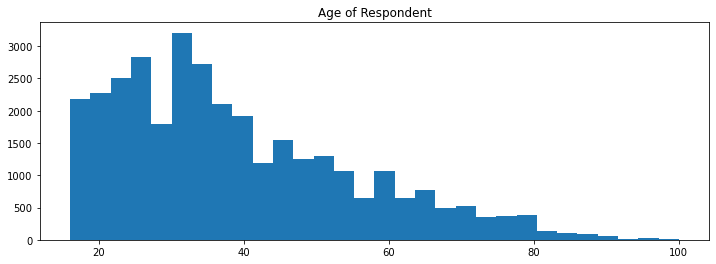

In [10]:
# age of respondent histogram plot
plt.figure(figsize=(12, 4))
plt.title('Age of Respondent')
plt.hist(all_data['age_of_respondent'], bins=30);

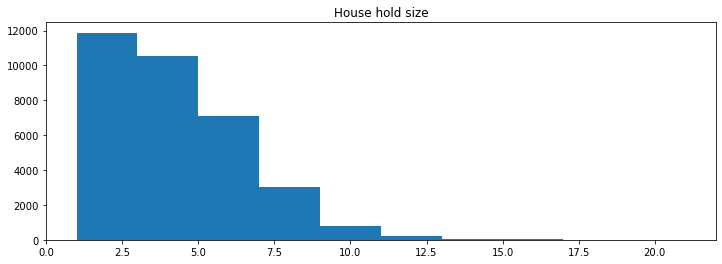

In [11]:
# household size histogram plot
plt.figure(figsize=(12, 4))
plt.title('House hold size')
plt.hist(all_data['household_size'], bins=10);

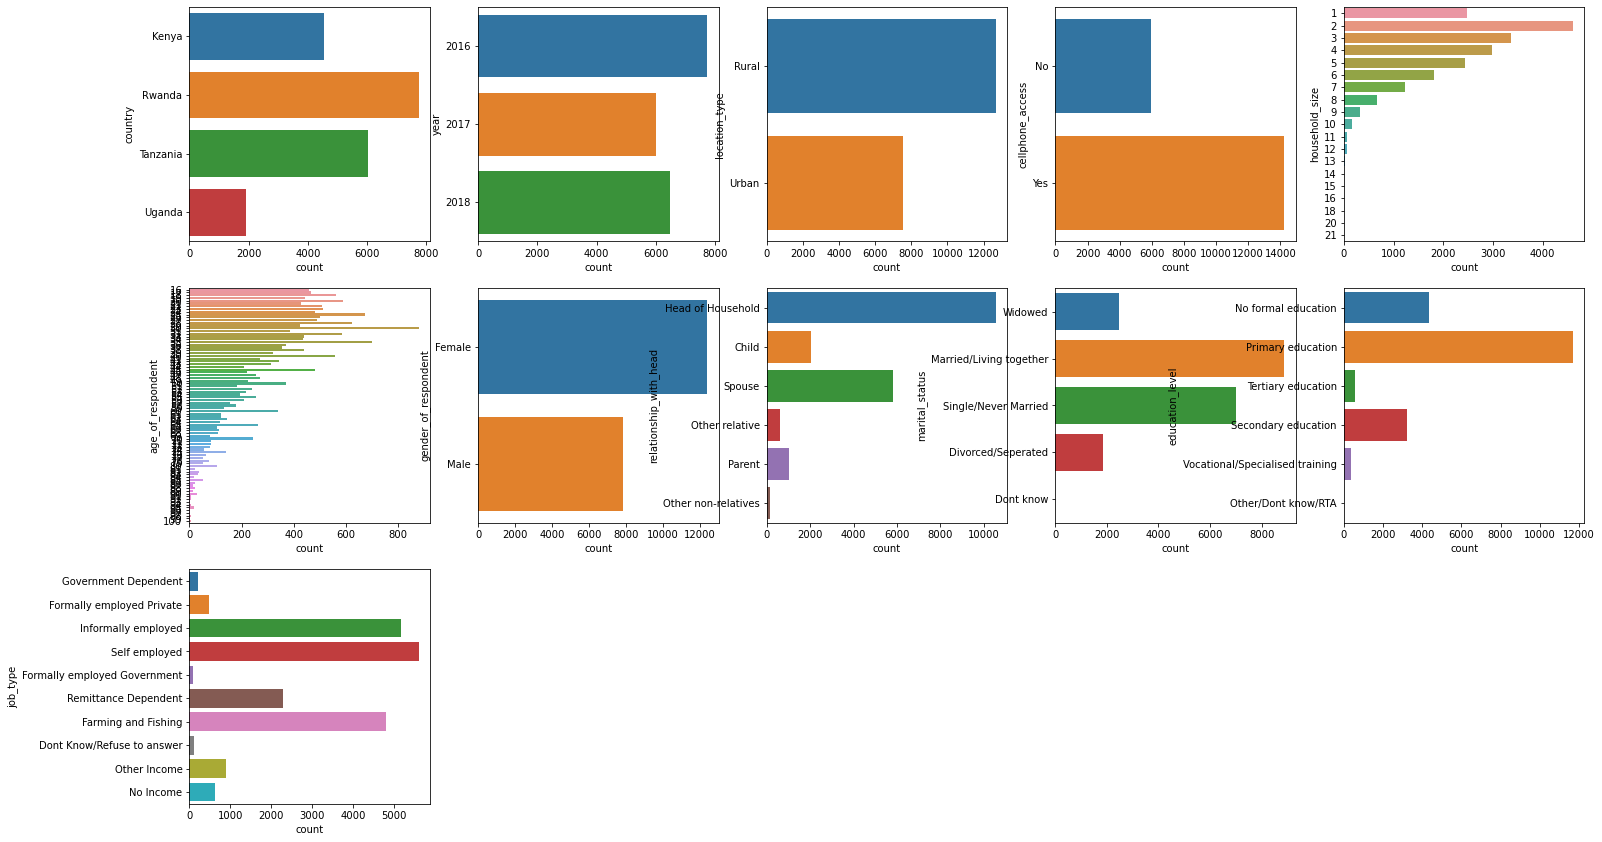

In [12]:
negative = train[train['bank_account'] == 'No']; positive= train[train['bank_account'] == 'Yes']
ll= ['country',
         'year',
         'location_type',
         'cellphone_access',
         'household_size',
         'age_of_respondent',
         'gender_of_respondent',
         'relationship_with_head',
         'marital_status',
         'education_level',
         'job_type']

plt.figure(figsize=(25, 25))
for index, col in enumerate(ll):
    
    plt.subplot(5, 5, index+1)
    sns.countplot(y= negative[col])

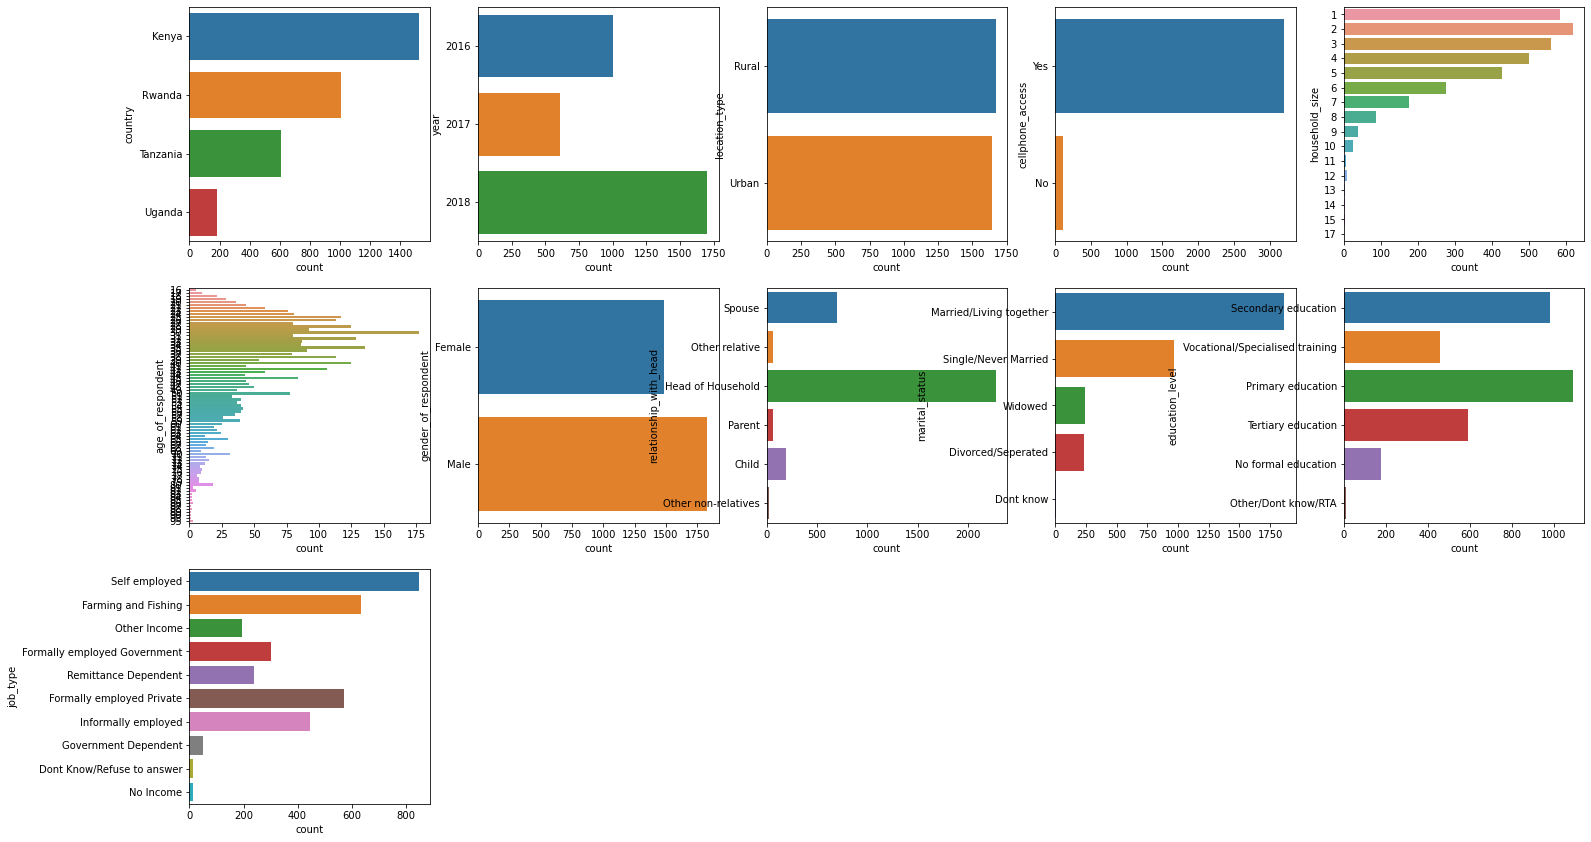

In [13]:
plt.figure(figsize=(25, 25))
for index, col in enumerate(ll):
    
    plt.subplot(5, 5, index+1)
    sns.countplot(y= positive[col])

In [14]:
D = {}
for col in all_data.columns:
    D[col] = all_data[col].nunique()

In [15]:
pd.Series(D)

country                       4
year                          3
uniqueid                  12480
bank_account                  2
location_type                 2
cellphone_access              2
household_size               20
age_of_respondent            85
gender_of_respondent          2
relationship_with_head        6
marital_status                5
education_level               6
job_type                     10
dtype: int64

<AxesSubplot:title={'center':'Target'}>

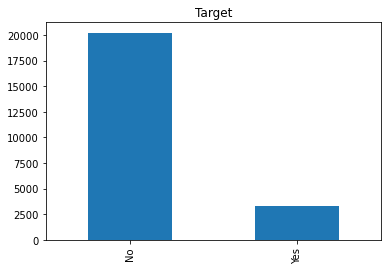

In [16]:
# target distribution for train set

train['bank_account'].value_counts().plot(kind='bar', title='Target')

In [17]:
all_data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [18]:
# categorical columns
col0= ['country', 'year',  'location_type',
       'cellphone_access', 'household_size',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']
len(col0)

10

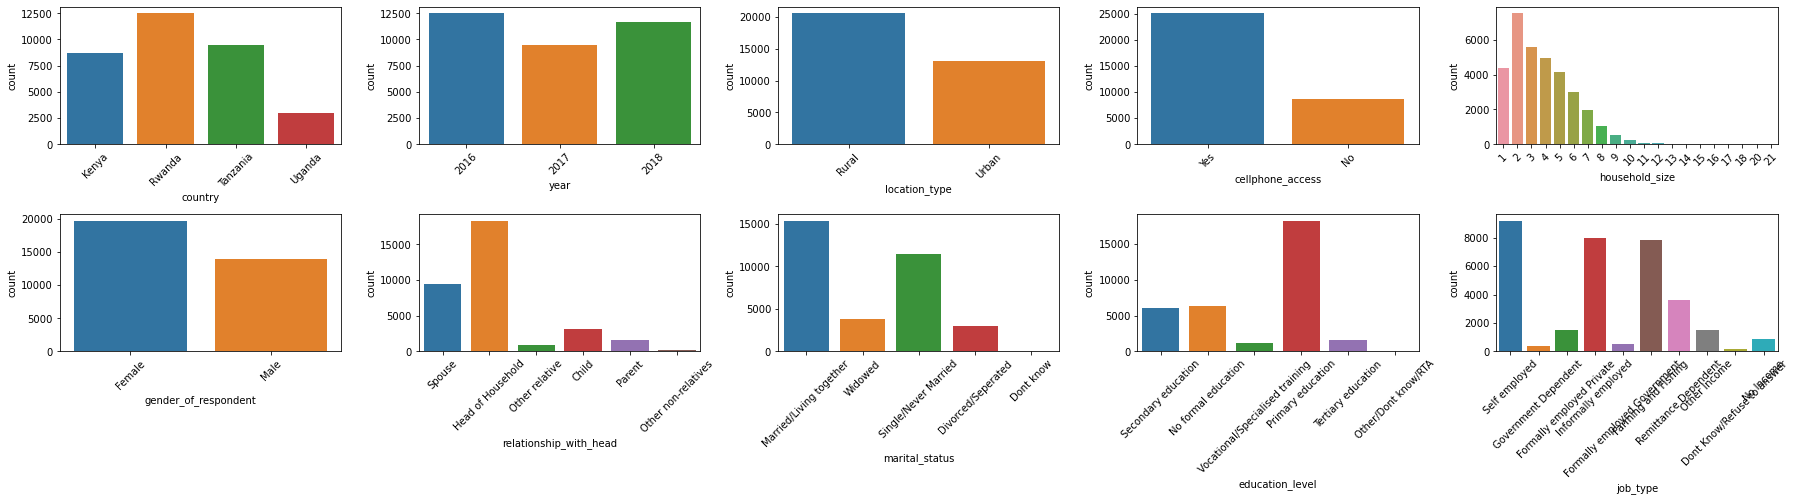

In [19]:
plt.figure(figsize=(25, 7))
for index, col in enumerate(col0):
    plt.subplot(2, 5, index+1)
    plt.tight_layout()
    sns.countplot(x = all_data[col])
    plt.xticks(rotation=45)

In [20]:
all_data['relationship_with_head'].value_counts(normalize=True)

Head of Household      0.545016
Spouse                 0.278637
Child                  0.094942
Parent                 0.046147
Other relative         0.027551
Other non-relatives    0.007706
Name: relationship_with_head, dtype: float64

In [21]:
all_data['marital_status'].value_counts(normalize=True)

Married/Living together    0.458554
Single/Never Married       0.340077
Widowed                    0.113508
Divorced/Seperated         0.087593
Dont know                  0.000268
Name: marital_status, dtype: float64

In [22]:
all_data['job_type'].value_counts(normalize=True)

Self employed                   0.274026
Informally employed             0.237102
Farming and Fishing             0.232401
Remittance Dependent            0.108123
Other Income                    0.044719
Formally employed Private       0.044600
No Income                       0.026867
Formally employed Government    0.016453
Government Dependent            0.010324
Dont Know/Refuse to answer      0.005385
Name: job_type, dtype: float64

In [23]:
all_data['household_size'].describe([.15, .25, .5, .6, .75, .9, .95, 1])

count    33610.000000
mean         3.791877
std          2.223138
min          1.000000
15%          2.000000
25%          2.000000
50%          3.000000
60%          4.000000
75%          5.000000
90%          7.000000
95%          8.000000
100%        21.000000
max         21.000000
Name: household_size, dtype: float64

In [24]:
# create bins for household size
#[1-3, 4-6, 7-9, 10+]
all_data['household_size_bin']= np.where(all_data['household_size'].\
                                     between(1, 5, inclusive='both'), '1-5', '')
all_data['household_size_bin']= np.where(all_data['household_size'].\
                                     between(6 ,np.inf, inclusive='both'), '6+', all_data['household_size_bin'])

<AxesSubplot:>

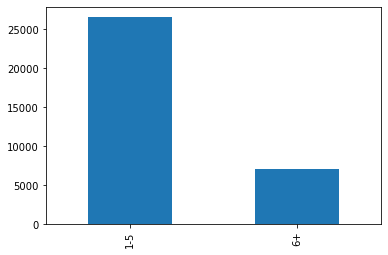

In [25]:
all_data['household_size_bin'].value_counts().plot(kind='bar')

In [26]:
all_data['household_size_bin'].value_counts(normalize=True)

1-5    0.789557
6+     0.210443
Name: household_size_bin, dtype: float64

In [27]:
all_data['age_of_respondent'].describe([.15, .25, .5, .6, .75, .9, .95, 1])

count    33610.000000
mean        38.656114
std         16.447127
min         16.000000
15%         22.000000
25%         26.000000
50%         35.000000
60%         40.000000
75%         49.000000
90%         63.000000
95%         71.000000
100%       100.000000
max        100.000000
Name: age_of_respondent, dtype: float64

Text(0.5, 1.0, 'Age')

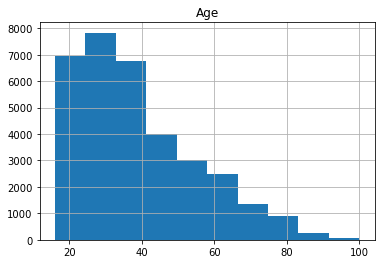

In [28]:
ax = all_data['age_of_respondent'].hist()
ax.set_title('Age')

In [29]:
all_data['age bins']= np.where(all_data['age_of_respondent'].between(15, 20), '15-20', '')
all_data['age bins']= np.where(all_data['age_of_respondent'].between(21, 40), '21-40', all_data['age bins'])
all_data['age bins']= np.where(all_data['age_of_respondent'].between(41, 60), '41-60', all_data['age bins'])
all_data['age bins']= np.where(all_data['age_of_respondent'].between(61, np.inf), '60+', all_data['age bins'])

<AxesSubplot:title={'center':'age of respondent bins'}>

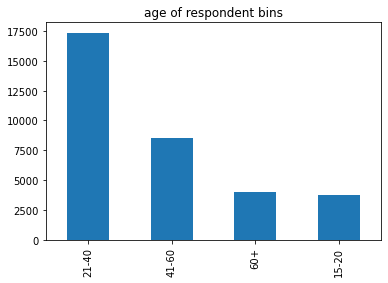

In [30]:
all_data['age bins'].value_counts().plot(kind='bar', title='age of respondent bins')

In [31]:
all_data['relationship with head bin']=\
np.where(all_data['relationship_with_head'].isin(['Head of Household', 'Spouse', 'Child']), 
                                             all_data['relationship_with_head'], 'other')

<AxesSubplot:>

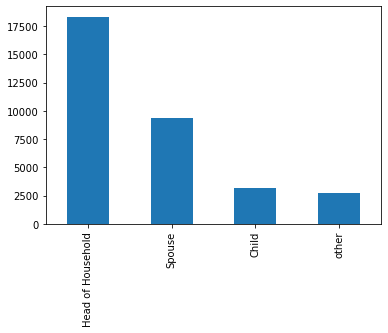

In [32]:
all_data['relationship with head bin'].value_counts().plot(kind='bar')

In [33]:
all_data['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [34]:
all_data['marital_status'].replace({'Married/Living together': 'married',
                                     'Single/Never Married': 'single'}, inplace=True)

all_data['marital_status'] = \
np.where(all_data['marital_status'].isin(['married','single' ]),
         all_data['marital_status'], 'other')

<AxesSubplot:title={'center':'marital status'}>

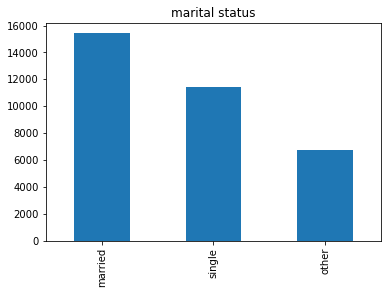

In [35]:
all_data['marital_status'].value_counts().plot(kind='bar', title='marital status')

In [36]:
all_data['education_level'].value_counts(normalize=True)

Primary education                  0.543588
No formal education                0.188962
Secondary education                0.182237
Tertiary education                 0.049063
Vocational/Specialised training    0.034573
Other/Dont know/RTA                0.001577
Name: education_level, dtype: float64

<AxesSubplot:>

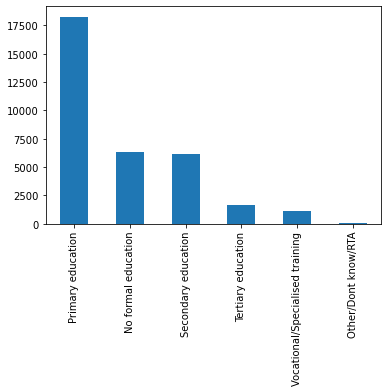

In [37]:
all_data['education_level'].value_counts().plot(kind='bar')

In [38]:
all_data['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [39]:
all_data['education_level'] = \
np.where(all_data['education_level'].\
         isin(['Secondary education', 'Primary education','Tertiary education']), 
         'formal', all_data['education_level'])

all_data['education_level'] = \
np.where(all_data['education_level'].\
         isin(['No formal education']), 
         'no formal education', all_data['education_level'])

all_data['education_level'] = \
np.where(all_data['education_level'].\
         isin(['Vocational/Specialised training', 'Other/Dont know/RTA']), 
         'other', all_data['education_level'])

<AxesSubplot:>

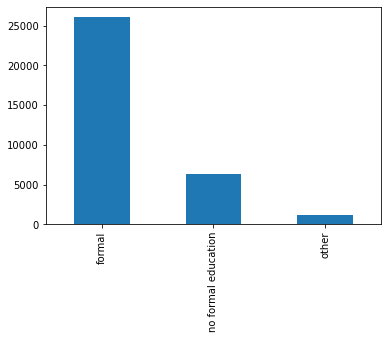

In [40]:
all_data['education_level'].value_counts().plot(kind='bar')

In [41]:
all_data['education_level'].value_counts(normalize=True)

formal                 0.774888
no formal education    0.188962
other                  0.036150
Name: education_level, dtype: float64

<AxesSubplot:title={'center':'job type'}>

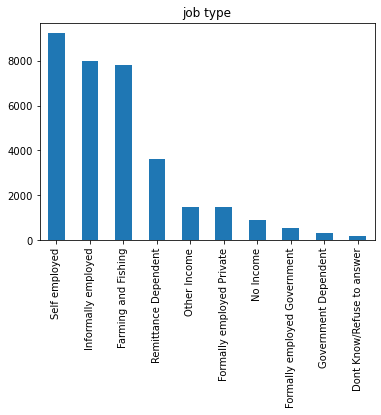

In [42]:
all_data['job_type'].value_counts().plot(kind='bar', title='job type')

In [43]:
all_data['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [44]:
all_data['job_type']= np.where(all_data['job_type'].isin(['Government Dependent', 'Remittance Dependent',
                                                         ]), 'dependent', all_data['job_type'])

all_data['job_type']= np.where(all_data['job_type'].\
                               isin(['Formally employed Private', 
                                     'Informally employed',
                                     'Formally employed Government', 'Self employed']),
                                 'employed', all_data['job_type'])

all_data['job_type']= np.where(all_data['job_type'].isin(['Farming and Fishing','Other Income',
                                                           'Dont Know/Refuse to answer'
                                                         ]), 'other', all_data['job_type'])

all_data['job_type']= np.where(all_data['job_type'].isin(['No Income']), 'no income', all_data['job_type'])

<AxesSubplot:title={'center':'Job type-reduced'}>

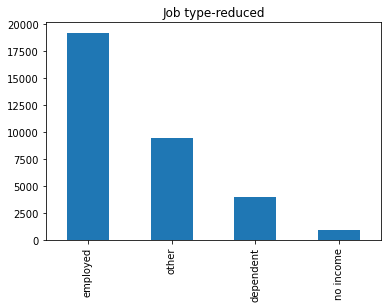

In [45]:
all_data['job_type'].value_counts().plot(kind='bar', title='Job type-reduced')

<AxesSubplot:title={'center':'age of respondent'}>

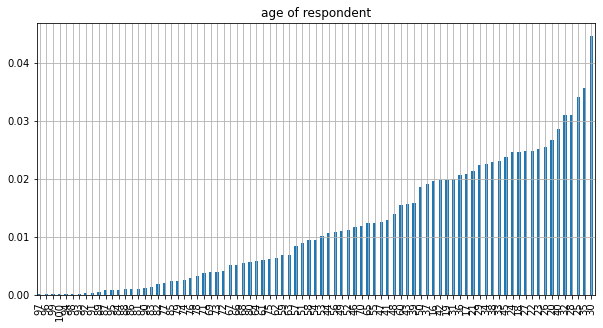

In [46]:
all_data['age_of_respondent'].value_counts(normalize=True).sort_values().\
plot(kind='bar', figsize=(10, 5), grid=True, title='age of respondent')

In [47]:
all_data['age_of_respondent']=\
np.where(all_data['age_of_respondent'].between(70, np.inf), '50+', all_data['age_of_respondent'])

In [48]:
all_data['household_size']= \
np.where(all_data['household_size'].between(5, np.inf), '5+', all_data['household_size'])

<AxesSubplot:title={'center':'Household size'}>

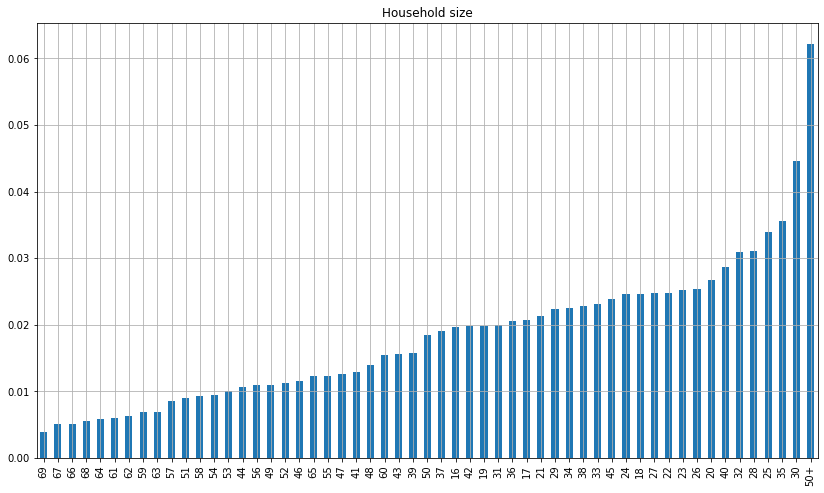

In [49]:
all_data['age_of_respondent'].value_counts(normalize=True).sort_values().\
plot(kind='bar', figsize=(14, 8), grid=True, title='Household size')

<AxesSubplot:>

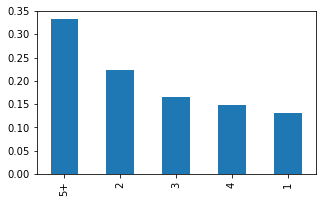

In [50]:
all_data['household_size'].value_counts(normalize=True).plot(kind='bar', figsize=(5, 3))

In [51]:
col1= ['country', 'year', 'location_type',
'cellphone_access', 'household_size', 'age_of_respondent',
'gender_of_respondent', 'relationship_with_head', 'marital_status',
'education_level', 'job_type', 'household_size_bin', 'age bins',
'relationship_with_head']

len(col1)

14

In [52]:
all_data[col1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   location_type           33610 non-null  object
 3   cellphone_access        33610 non-null  object
 4   household_size          33610 non-null  object
 5   age_of_respondent       33610 non-null  object
 6   gender_of_respondent    33610 non-null  object
 7   relationship_with_head  33610 non-null  object
 8   marital_status          33610 non-null  object
 9   education_level         33610 non-null  object
 10  job_type                33610 non-null  object
 11  household_size_bin      33610 non-null  object
 12  age bins                33610 non-null  object
 13  relationship_with_head  33610 non-null  object
dtypes: int64(1), object(13)
memory usage: 4.9+ MB


<AxesSubplot:xlabel='count', ylabel='cellphone_access'>

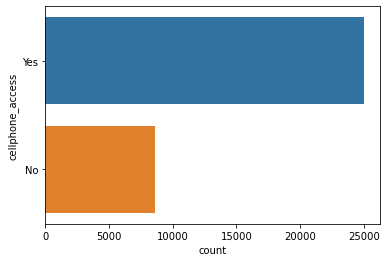

In [53]:
sns.countplot(y=all_data[col1[3]])

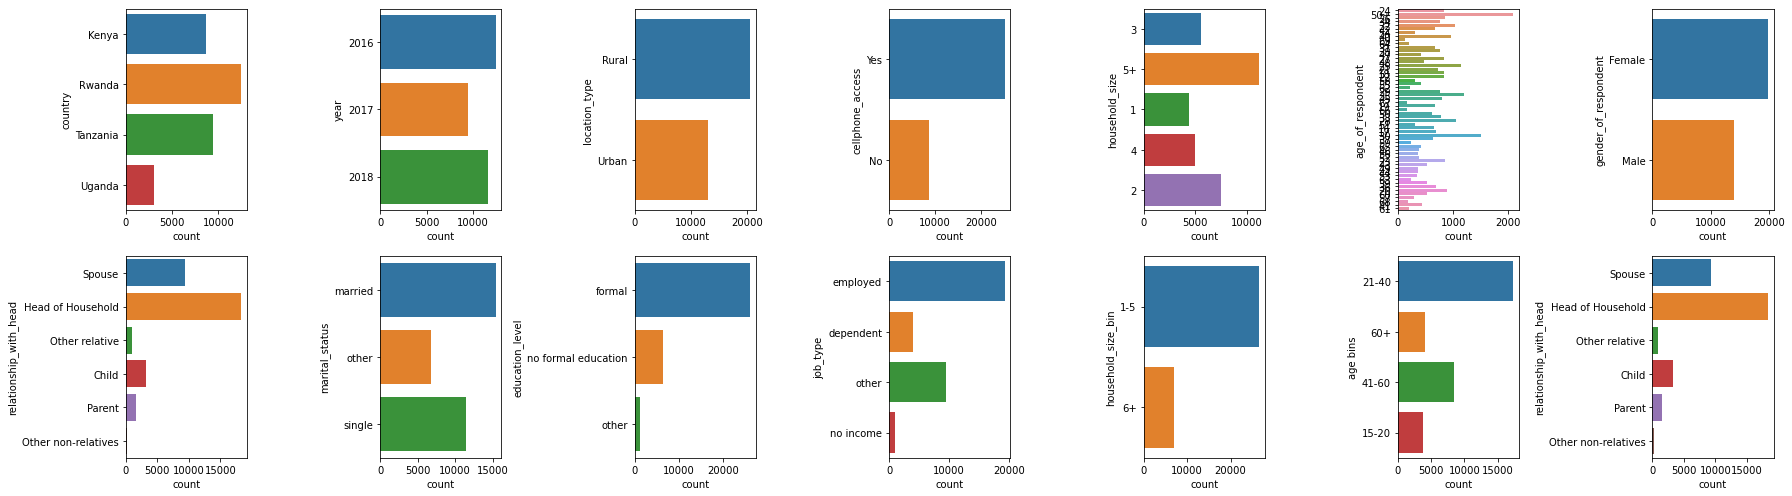

In [54]:
plt.figure(figsize=(25, 7))
for index, col in enumerate(col1):
    plt.subplot(2, 7, index+1)
    plt.tight_layout()
    sns.countplot(y=all_data[col])

In [55]:
all_data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'household_size_bin', 'age bins',
       'relationship with head bin'],
      dtype='object')

In [56]:
# adding new features
all_data['year'] = all_data['year'].astype('str')

all_data['gender&country']= all_data[['gender_of_respondent', 'country']].agg('_'.join, axis=1)

all_data['gender&education']=all_data[['gender_of_respondent', 'education_level']].agg('_'.join, axis=1)


all_data['country&year'] = all_data[['country', 'year']].agg('_'.join, axis=1)

all_data['location&phone_access'] = all_data[['location_type', 'cellphone_access']].agg('_'.join, axis=1)

all_data['locaton&house_size'] = all_data[['location_type', 'household_size']].agg('_'.join, axis=1)

all_data['phone_access&age_bins'] = all_data[['cellphone_access', 'age bins']].agg('_'.join, axis=1)

In [57]:
all_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,job_type,household_size_bin,age bins,relationship with head bin,gender&country,gender&education,country&year,location&phone_access,locaton&house_size,phone_access&age_bins
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,...,employed,1-5,21-40,Spouse,Female_Kenya,Female_formal,Kenya_2018,Rural_Yes,Rural_3,Yes_21-40
1,Kenya,2018,uniqueid_2,No,Rural,No,5+,50+,Female,Head of Household,...,dependent,1-5,60+,Head of Household,Female_Kenya,Female_no formal education,Kenya_2018,Rural_No,Rural_5+,No_60+
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5+,26,Male,Other relative,...,employed,1-5,21-40,other,Male_Kenya,Male_other,Kenya_2018,Urban_Yes,Urban_5+,Yes_21-40
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5+,34,Female,Head of Household,...,employed,1-5,21-40,Head of Household,Female_Kenya,Female_formal,Kenya_2018,Rural_Yes,Rural_5+,Yes_21-40
4,Kenya,2018,uniqueid_5,No,Urban,No,5+,26,Male,Child,...,employed,6+,21-40,Child,Male_Kenya,Male_formal,Kenya_2018,Urban_No,Urban_5+,No_21-40


In [58]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country                     33610 non-null  object
 1   year                        33610 non-null  object
 2   uniqueid                    33610 non-null  object
 3   bank_account                23524 non-null  object
 4   location_type               33610 non-null  object
 5   cellphone_access            33610 non-null  object
 6   household_size              33610 non-null  object
 7   age_of_respondent           33610 non-null  object
 8   gender_of_respondent        33610 non-null  object
 9   relationship_with_head      33610 non-null  object
 10  marital_status              33610 non-null  object
 11  education_level             33610 non-null  object
 12  job_type                    33610 non-null  object
 13  household_size_bin          33610 non-null  ob

In [59]:
all_data.shape

(33610, 22)

In [60]:
list(all_data)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'household_size_bin',
 'age bins',
 'relationship with head bin',
 'gender&country',
 'gender&education',
 'country&year',
 'location&phone_access',
 'locaton&house_size',
 'phone_access&age_bins']

In [61]:
all_data.drop(['uniqueid', ], axis=1, inplace=True)

In [62]:
all_data['bank_account'].replace({'Yes':1, 'No': 0}, inplace=True)

In [63]:
all_data.isna().sum()

country                           0
year                              0
bank_account                  10086
location_type                     0
cellphone_access                  0
household_size                    0
age_of_respondent                 0
gender_of_respondent              0
relationship_with_head            0
marital_status                    0
education_level                   0
job_type                          0
household_size_bin                0
age bins                          0
relationship with head bin        0
gender&country                    0
gender&education                  0
country&year                      0
location&phone_access             0
locaton&house_size                0
phone_access&age_bins             0
dtype: int64

In [64]:
all_data.head(8)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,...,job_type,household_size_bin,age bins,relationship with head bin,gender&country,gender&education,country&year,location&phone_access,locaton&house_size,phone_access&age_bins
0,Kenya,2018,1.0,Rural,Yes,3,24,Female,Spouse,married,...,employed,1-5,21-40,Spouse,Female_Kenya,Female_formal,Kenya_2018,Rural_Yes,Rural_3,Yes_21-40
1,Kenya,2018,0.0,Rural,No,5+,50+,Female,Head of Household,other,...,dependent,1-5,60+,Head of Household,Female_Kenya,Female_no formal education,Kenya_2018,Rural_No,Rural_5+,No_60+
2,Kenya,2018,1.0,Urban,Yes,5+,26,Male,Other relative,single,...,employed,1-5,21-40,other,Male_Kenya,Male_other,Kenya_2018,Urban_Yes,Urban_5+,Yes_21-40
3,Kenya,2018,0.0,Rural,Yes,5+,34,Female,Head of Household,married,...,employed,1-5,21-40,Head of Household,Female_Kenya,Female_formal,Kenya_2018,Rural_Yes,Rural_5+,Yes_21-40
4,Kenya,2018,0.0,Urban,No,5+,26,Male,Child,single,...,employed,6+,21-40,Child,Male_Kenya,Male_formal,Kenya_2018,Urban_No,Urban_5+,No_21-40
5,Kenya,2018,0.0,Rural,No,5+,26,Female,Spouse,married,...,employed,6+,21-40,Spouse,Female_Kenya,Female_formal,Kenya_2018,Rural_No,Rural_5+,No_21-40
6,Kenya,2018,0.0,Rural,Yes,5+,32,Female,Spouse,married,...,employed,6+,21-40,Spouse,Female_Kenya,Female_formal,Kenya_2018,Rural_Yes,Rural_5+,Yes_21-40
7,Kenya,2018,0.0,Rural,Yes,1,42,Female,Head of Household,married,...,employed,1-5,41-60,Head of Household,Female_Kenya,Female_formal,Kenya_2018,Rural_Yes,Rural_1,Yes_41-60


In [65]:
all_data.dtypes

country                        object
year                           object
bank_account                  float64
location_type                  object
cellphone_access               object
household_size                 object
age_of_respondent              object
gender_of_respondent           object
relationship_with_head         object
marital_status                 object
education_level                object
job_type                       object
household_size_bin             object
age bins                       object
relationship with head bin     object
gender&country                 object
gender&education               object
country&year                   object
location&phone_access          object
locaton&house_size             object
phone_access&age_bins          object
dtype: object

In [67]:
X= all_data[['country',
             'year',
             'location_type',
             'cellphone_access',
             'household_size',
             'age_of_respondent',
             'gender_of_respondent',
             'relationship_with_head',
             'marital_status',
             'education_level',
             'job_type',
             'household_size_bin',
             'age bins',
             'relationship with head bin',
             'gender&country',
             'gender&education',
             'country&year',
             'location&phone_access',
             'locaton&house_size',
             'phone_access&age_bins']]

y = all_data['bank_account']

In [68]:
# libraries for model building & evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import auc, classification_report, f1_score, mean_absolute_error
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [69]:
over= RandomOverSampler()
under = RandomUnderSampler()
smote= SMOTE()
ohe= OneHotEncoder()
sc= StandardScaler()
mm = MinMaxScaler()

In [70]:
# we create training & validation set

indp, target = X.iloc[:23524, :], y.iloc[:23524] 
indp_test= X.iloc[23525:, :]

X_train, X_val, y_train, y_val = train_test_split(indp,  target, 
                                                      stratify=target, 
                                                      test_size=.8, 
                                                      random_state=100)
print('train size: ',X_train.shape)
print('validation size: ', X_val.shape)
print('test size: ', indp_test.shape)

train size:  (4704, 20)
validation size:  (18820, 20)
test size:  (10085, 20)


In [ ]:
list(all_data)

In [71]:
# make pipeline
cat= [   'country',
         'year',
         'location_type',
         'cellphone_access',
         'household_size',
         'age_of_respondent',
         'gender_of_respondent',
         'relationship_with_head',
         'marital_status',
         'education_level',
         'job_type',
         'household_size_bin',
         'age bins',
         'relationship with head bin',
         'gender&country',
         'gender&education',
         'country&year',
         'location&phone_access',
         'locaton&house_size',
         'phone_access&age_bins']
     
col_trans = ColumnTransformer([('ohe', ohe, cat)])

In [72]:
clf1 = RandomForestClassifier()
clf2= DecisionTreeClassifier()

lists = [clf1, clf2]
names = ['RandomForest', 'DecisionTree']


MODELS = []
ACC = []
MAE = []
for model, name in zip(lists, names):
    pipe = Pipeline([('transf', col_trans),('sampler', over), ('sampler2', smote) , ('clf' , model)])
    
    mod = pipe.fit(X_train, y_train)
    MODELS.append(mod)
    
    pred = mod.predict(X_val)
    scores = mod.score(X_val, y_val)
    ACC.append(scores)
    
    mae = mean_absolute_error(y_val, pred)
    MAE.append(mae) 

In [73]:
pd.DataFrame([ACC, MAE], index= ['accuracy', 'MAE'], columns=names)

,RandomForest,DecisionTree
accuracy,0.817535,0.790648
MAE,0.182465,0.209352


In [74]:
np.round(np.sqrt(len(list(X))))

4.0

In [75]:
treeModel = DecisionTreeClassifier(max_features=5, 
                                   min_samples_split=5, 
                                   min_samples_leaf=1
                                  )

treeModel= Pipeline([('transf', col_trans),('sampler', over), ('sampler2', smote) , ('clf' , treeModel)])
treeModel.fit(X_train, y_train)

pred= treeModel.predict(X_val)
mean_absolute_error(y_val, pred)

0.21025504782146653

In [76]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88     16170
         1.0       0.30      0.38      0.34      2650

    accuracy                           0.79     18820
   macro avg       0.60      0.62      0.61     18820
weighted avg       0.81      0.79      0.80     18820



In [83]:
forestModel = RandomForestClassifier(n_estimators=300, max_depth=40,max_features=5, ccp_alpha=.0, random_state=333)

forestModel= Pipeline([('transf', col_trans),('sampler', over), 
                       ('sampler2', smote) , ('clf' , forestModel)
                      ])
forestModel.fit(X_train, y_train)

pred= forestModel.predict(X_val)
mean_absolute_error(y_val, pred)

0.18336875664187036

In [84]:
print(classification_report(y_val, pred));

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89     16170
         1.0       0.36      0.38      0.37      2650

    accuracy                           0.82     18820
   macro avg       0.63      0.63      0.63     18820
weighted avg       0.82      0.82      0.82     18820



In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, pred)

array([[14382,  1788],
       [ 1655,   995]])

In [80]:
list(X)

['country',
 'year',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'household_size_bin',
 'age bins',
 'relationship with head bin',
 'gender&country',
 'gender&education',
 'country&year',
 'location&phone_access',
 'locaton&house_size',
 'phone_access&age_bins']

<AxesSubplot:title={'center':'Decision Tree Feature Importance'}>

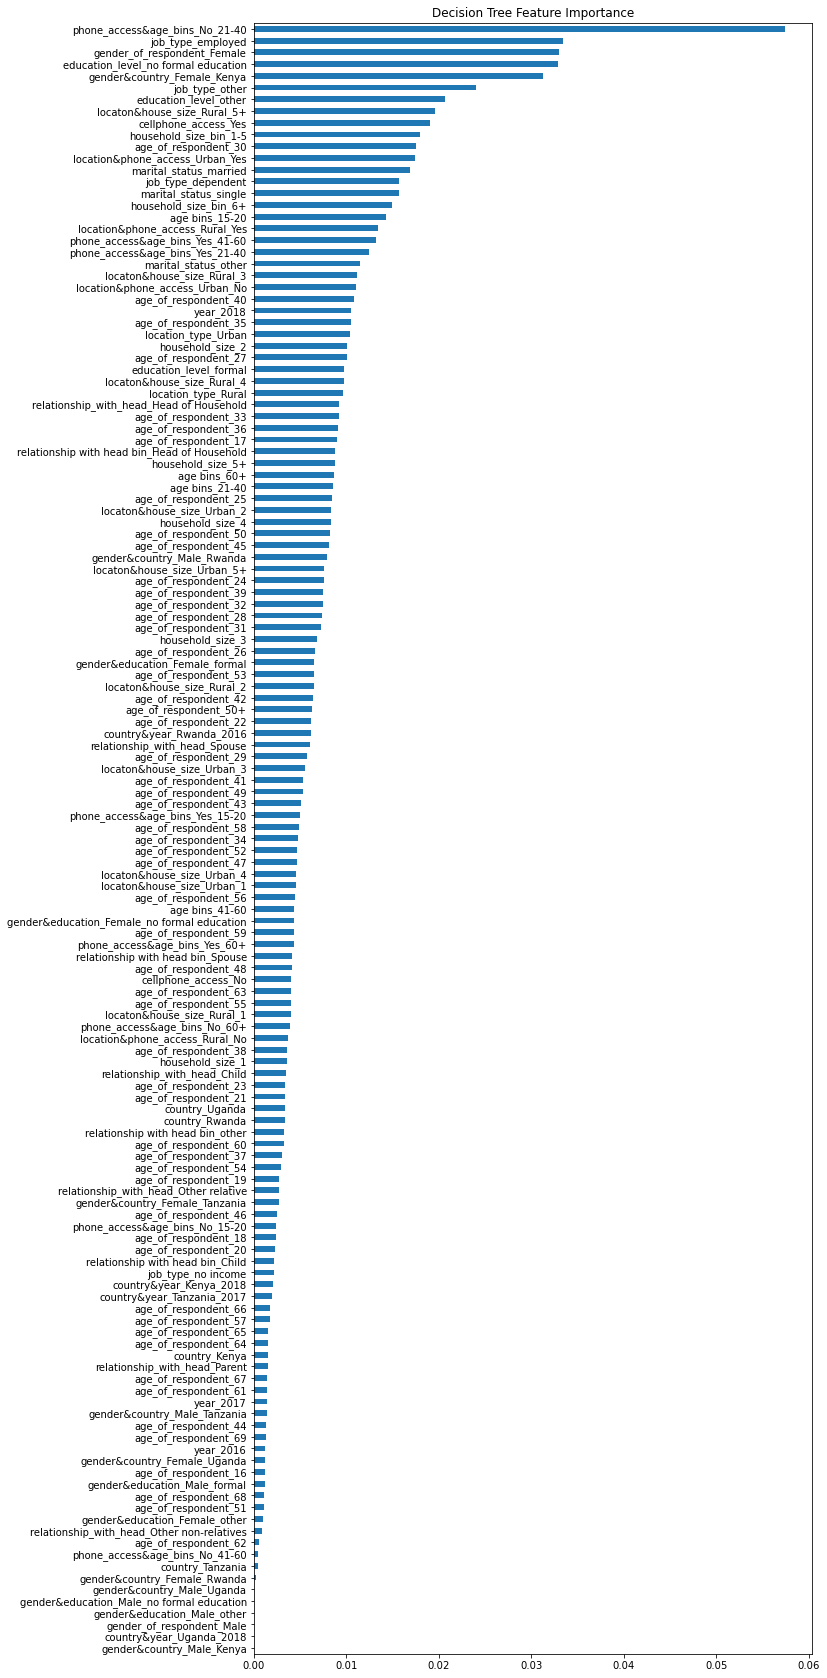

In [81]:
values = treeModel.steps[3][1].feature_importances_ # values
keys = treeModel.steps[0][1].transformers_[0][1].get_feature_names(list(X))
pd.Series(values, index=keys).sort_values().plot(kind='barh', 
                                                 figsize=(10, 30), title='Decision Tree Feature Importance')
#plt.savefig('feature importances.png', transparent=False)

In [104]:
tree_feature_imp= pd.Series(values, index=keys)
list(tree_feature_imp[tree_feature_imp.values < .01].index)

['country_Rwanda',
 'country_Tanzania',
 'country_Uganda',
 'year_2016',
 'year_2017',
 'year_2018',
 'household_size_1',
 'household_size_4',
 'age_of_respondent_16',
 'age_of_respondent_17',
 'age_of_respondent_18',
 'age_of_respondent_19',
 'age_of_respondent_20',
 'age_of_respondent_21',
 'age_of_respondent_22',
 'age_of_respondent_23',
 'age_of_respondent_24',
 'age_of_respondent_26',
 'age_of_respondent_27',
 'age_of_respondent_28',
 'age_of_respondent_29',
 'age_of_respondent_31',
 'age_of_respondent_32',
 'age_of_respondent_33',
 'age_of_respondent_34',
 'age_of_respondent_36',
 'age_of_respondent_37',
 'age_of_respondent_38',
 'age_of_respondent_39',
 'age_of_respondent_40',
 'age_of_respondent_41',
 'age_of_respondent_42',
 'age_of_respondent_43',
 'age_of_respondent_44',
 'age_of_respondent_45',
 'age_of_respondent_46',
 'age_of_respondent_47',
 'age_of_respondent_48',
 'age_of_respondent_49',
 'age_of_respondent_50',
 'age_of_respondent_50+',
 'age_of_respondent_51',
 'age_

<AxesSubplot:>

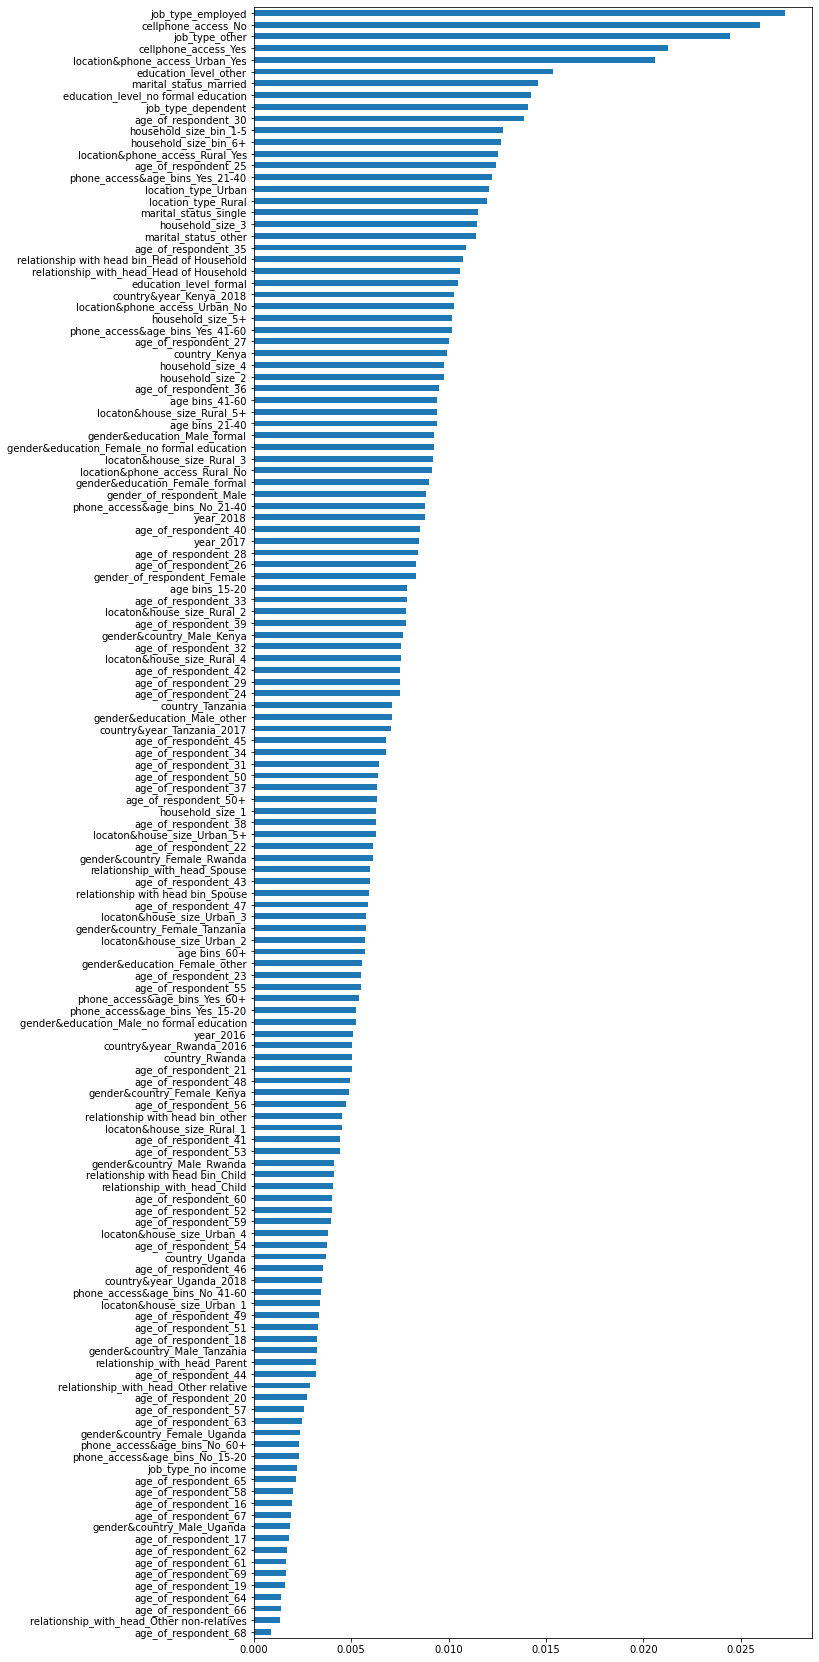

In [96]:
# feature importances
values1 = forestModel.steps[3][1].feature_importances_ # values
keys1 = forestModel.steps[0][1].transformers_[0][1].get_feature_names(list(X))
pd.Series(values1, index=keys1).sort_values().plot(kind='barh', figsize=(10, 30))
#plt.savefig('feature importances.png', transparent=False)

In [103]:
rf_feature_imp= pd.Series(values1, index=keys1)
list(rf_feature_imp[rf_feature_imp.values < .01].index)

['country_Kenya',
 'country_Rwanda',
 'country_Tanzania',
 'country_Uganda',
 'year_2016',
 'year_2017',
 'year_2018',
 'household_size_1',
 'household_size_2',
 'household_size_4',
 'age_of_respondent_16',
 'age_of_respondent_17',
 'age_of_respondent_18',
 'age_of_respondent_19',
 'age_of_respondent_20',
 'age_of_respondent_21',
 'age_of_respondent_22',
 'age_of_respondent_23',
 'age_of_respondent_24',
 'age_of_respondent_26',
 'age_of_respondent_28',
 'age_of_respondent_29',
 'age_of_respondent_31',
 'age_of_respondent_32',
 'age_of_respondent_33',
 'age_of_respondent_34',
 'age_of_respondent_36',
 'age_of_respondent_37',
 'age_of_respondent_38',
 'age_of_respondent_39',
 'age_of_respondent_40',
 'age_of_respondent_41',
 'age_of_respondent_42',
 'age_of_respondent_43',
 'age_of_respondent_44',
 'age_of_respondent_45',
 'age_of_respondent_46',
 'age_of_respondent_47',
 'age_of_respondent_48',
 'age_of_respondent_49',
 'age_of_respondent_50',
 'age_of_respondent_50+',
 'age_of_responde

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

split10 = KFold(n_splits=4)

rf = Pipeline([('transf', col_trans),('sampler', over), 
                       ('sampler2', smote) , ('clf' , RandomForestClassifier(),)
                      ])

para= {'clf__n_estimators': [100, 110, 130, 200],
       'clf__max_depth': [2, 4, 8, 19, 14],
      'clf__max_features': [4, 5, 6, 7, 9, 11]}

randTunedRF = RandomizedSearchCV(estimator=rf, cv=split10, n_iter=5,param_distributions=para);
randTunedRF.fit(X_train, y_train);

In [ ]:
randTunedRF.best_params_

In [ ]:
pred2= randTunedRF.predict(X_val)
mean_absolute_error(y_val, pred2)

In [ ]:
forestModel1 = RandomForestClassifier(n_estimators=300, max_features=5, ccp_alpha=0, random_state=333)

forestModel1= Pipeline([('transf', col_trans),('sampler', over), ('sampler2', smote) , ('clf' , forestModel1)])
forestModel1.fit(X_train, y_train)

pred1= forestModel1.predict(X_val)
mean_absolute_error(y_val, pred1)

In [ ]:
print(classification_report(y_val, pred1))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, pred1, normalize='all')

In [100]:
DecisionTreeClassifier?

In [ ]:
GoodModel = load('output/decision-tree[0.129].pkl')
pred = GoodModel.predict(X_val)
mean_absolute_error(y_val, pred)

print(classification_report(y_val, pred))

In [ ]:
print(confusion_matrix(y_val, pred, normalize='all'))

In [ ]:
print('mean absolute error', mean_absolute_error(y_val, pred))

In [ ]:
print(GoodModel)